In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as spla
import scipy.ndimage as ndimage
from matplotlib import image, pyplot as plt
import matplotlib.patches as patches

from tucker_riemopt import Tucker
from tucker_riemopt.tucker import SparseTensor
from tucker_riemopt import backend as back

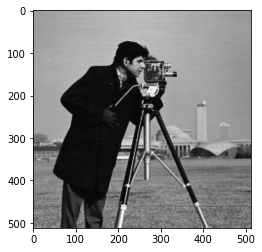

In [2]:
im = image.imread("cameraman.jpg")[1:,1:] # Fix strange size 513x513
plt.imshow(im, cmap="gray")
plt.show()

known 0.23% of image


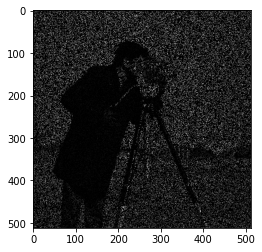

In [3]:
m, n = im.shape
assert m == n == 512
base = 8
d = 6

count = 60000
# count = 60

rng = np.random.default_rng(42)
rows = rng.integers(0, m, (count,))
cols = rng.integers(0, n, (count,))
vals = im[rows, cols]

print(f"known {np.round(count / (m*n), 2)}% of image")

known = SparseTensor((m, n), [rows, cols], vals)
plt.imshow(known.to_dense(), cmap="gray")
plt.show()

In [4]:
def detach_multiindex(multiindex, shape):
    """
        Performs detaching of multiindex back to tuple of indices. Excepts p-mode.
    """
    inds = []
    dynamic = np.zeros_like(multiindex) # use dynamic programming to prevent d**2 complexity
    shape_prod = back.prod(back.tensor(shape))
    for i in range(len(shape) - 1, -1, -1):
        shape_prod //= shape[i]
        inds.append((multiindex - dynamic) // shape_prod)
        dynamic += inds[-1] * shape_prod
    return inds[::-1]

In [5]:
# detach_multiindex(np.array([413, 0]), (64, 4, 2))
# detach_multiindex((413), (8, 8, 8))

In [6]:
known = known.reshape([[8]*3, [8]*3])

In [8]:
t_known = Tucker.sparse2tuck(known.shape, known.inds, known.vals, max_rank=[7]*6)
t_known += t_known
t_known =t_known.round([8]*6)

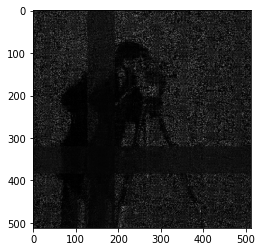

In [11]:
rest_img = t_known.full().reshape(512, 512, order="F").astype(int)
rest_img = np.array(rest_img)
rest_img[rest_img < 0] = 0
plt.imshow(rest_img, cmap="gray")
plt.show()

In [10]:
t_known.rank

(8, 8, 8, 8, 8, 8)